# Local to equatorial coordinates transformation

For the second part of the posdoc I will recopile data from meteors observed by local witnesses and documented by the American Meteor Society, data available at https://www.amsmeteors.org/. The data includes date and time of the event, apparent magnitude, witness location, local coordinates of the trail, color of the radiation emmited by the bolide, etc. With this we expect to find other data commonly available from other databases such like NASA CNEOs and the Geostationary Lighning Mapper (GLM). The justification of this work is simply that the detectors used by NASA were planned initially to detect blasts originated by nuclear explosions, and were confidential for military purposes, when the data was released, were found out that many "blasts" were produced by bolides instead. The problem is that there are few recorded events in mexican territory in this database. The GLM has a lot of data in mexican territory, since it consists in geostationary satellites looking at the american continent. It gives bolide location of the fragmentation, date and time, duration and a light curve. The GLM started working in 2017, so there is no data before this year, and the GLM is designed to detect lightning, but is proven that also can detect bolides. Since the GLM is not designed specifically to detect bolides, it does not detect objects with magnitude greater than -14, but can not detect also too bright object, due to the saturation of the detectors. The result is that the database of the GLM consists in bolides between a few decimeters to a few meters. Bolides outside of this range are discarded. Using the data from the AMS we expect to fill the gaps in these databases and get valuable information. 

Here we will use reported the location of witnesses and reported coordinates of the object in order to find the fixed coordinates of the bolide trail.

## Transformation from local coordinates to equatiorial

The tranformation from local coordinates to equatorial coordinates, is given by:
\begin{align}
\sin{h}\cos{\delta} &= \sin{A}\cos{a}\\
\cos{h}\cos{\delta} &= \cos{A}\cos{a}\sin{\phi} + \sin{a}\cos{\phi} \\
\sin{\delta} &= -\cos{A}\cos{a}\cos{\phi} + \sin{a}\sin{\phi}
\end{align}

Where $\delta$ is the declination, $h$ is the hour angle, $A$ is the Azimuth, $a$ the elevation and $\phi$ the observer latitude.

The inverse transformation is given by:
\begin{align}
\sin{A}\cos{a} &= \sin{h}\cos{\delta} \\
\cos{A}\cos{a} &= \cos{h}\cos{\delta}\sin{\phi} - \sin{\delta}\cos{\phi} \\
\sin{a} &= \cos{h}\cos{\delta}\cos{\phi} + \sin{\delta}\sin{\phi}
\end{align}

From The other work we deduced a relation between hour angle and object latitude and observer latitude:
\begin{equation}
h = \lambda_{obs} - \lambda_{obj}
\end{equation}
where $\lambda_{obs}$ $\lambda_{obj}$ are the longitude of the observer and object, respectively.

With this we get the hour angle and the declination as follows:
\begin{align}
\sin{\delta} &= -\cos{A}\cos{a}\cos{\phi} + \sin{a}\sin{\phi} \\
\cos{h} &= \frac{\sin{a} - \sin{\delta}\sin{\phi}}{\cos{\delta}\cos{\phi}}
\end{align}

Let's try this theory with real data. We will use with one of the already recorded meteors data. The event with ID 2060-2022.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coord_transform(long, phi, Az, Alt):
    """
    Inputs: 
    long: Longitude of the witness (degrees)
    phi: Latitude of the witness (radians)
    Az: Azimuth of the object (radians)
    Alt: Altitude of the object (radians)
    Output:
    Lat_o: Transformaed Latitude (degrees)
    Long_o: Transformed Longitude (degrees)
    """
    
    sin_delta = -np.cos(Az)*np.cos(Alt)*np.cos(phi) +np.sin(Alt)*np.sin(phi)
    cos_delta = np.sqrt(1.-sin_delta**2)
    cos_h = (np.sin(Alt)-sin_delta*np.sin(phi))/(cos_delta*np.cos(phi))
    Lat_o = np.degrees(np.arcsin(sin_delta))
    h = np.degrees(np.arccos(cos_h))
    Lon_o = long -h
    return Lon_o, Lat_o

## Enter inputs of the meteor

In [3]:
w_latitude = np.array([26.14, 28.03, 30.22, 30.16, 30.08])
w_longitude = np.array([-97.63, -97.52, -96.31, -97.86, -99.22])
Az_0 = np.array([25., np.nan, 233.13, 211.15, 174.61])
Az_f = np.array([10., 324.46, 293.89, 261.15, 177.1])
Alt_0 = np.array([15., 44., 38., 45., 50.])
Alt_f = np.array([9., 38., np.nan, 10., 21.])

In [4]:
lon_0, lat_0 = coord_transform(w_longitude, np.radians(w_latitude), np.radians(Az_0), np.radians(Alt_0))
lon_f, lat_f = coord_transform(w_longitude, np.radians(w_latitude), np.radians(Az_f), np.radians(Alt_f))

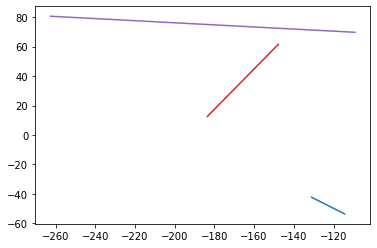

In [5]:
#plt.plot(w_longitude, w_latitude, "ro")
plt.plot([lon_0, lon_f], [lat_0, lat_f])

## Try with other meteor (740-2022)

In [131]:
w_latitude = np.array([30.27, 28.15, 29.68, 29.57, 33.65])
w_longitude = np.array([-97.75, -97.88, -95.89, -95.07, -96.52])
Az_0 = np.array([224.28, 337.32, 240., 250., 194.13])
Az_f = np.array([308.74, 10.17, 330., 280., 224.16])
Alt_0 = np.array([34., 37., 45., 30., 33.])
Alt_f = np.array([17., 24., 40, 25., 30.])

In [132]:
lon_0, lat_0 = coord_transform(w_longitude, np.radians(w_latitude), np.radians(Az_0), np.radians(Alt_0))
lon_f, lat_f = coord_transform(w_longitude, np.radians(w_latitude), np.radians(Az_f), np.radians(Alt_f))
lon = np.linspace(-200, 0)
lat = (av_slope*lon-50) -400
slope = (lat_f - lat_0)/(lon_f-lon_0)
av_slope = np.mean(slope)

(-50.0, 90.0)

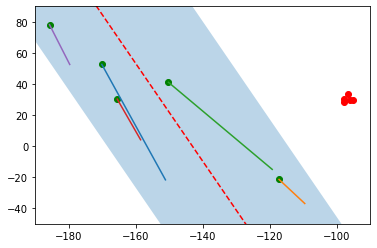

In [138]:
#fig = plt.figure()
#ax =fig.add_subplot(111, projection="aitoff")
plt.plot(w_longitude, w_latitude, "ro")
i=1
plt.plot(lon_0, lat_0, "go")
max_lat_0 = np.max(lat_0)
min_lat_f = np.min(lat_f)
avg_lon0 = np.mean(lon_0)
avg_lonf = np.mean(lon_f)
std_lon0 = np.std(lon_0)
std_lonf = np.std(lon_f)
plt.fill_between(lon, (av_slope*lon+40) -400, (av_slope*lon-130) -400, alpha=0.3)
plt.plot(lon, lat, "r--")
for lon0, lonf, lat0, latf in zip(lon_0, lon_f, lat_0, lat_f):
    plt.plot([lon0, lonf], [lat0, latf], label="Witness No. {}".format(str(i)))
    i+=1
plt.xlim(-190, -90)
plt.ylim(-50, 90)

This one has better consistent trajectories. Is pretty obvious that different witnesses recorded the meteor trajectory in different moments of its trajectory. The average slope works fine when obtaining a plausible trajectory, but the uncertainties (marked by the shadowed zone) are not too clear how to obtain them. What if I add more witnesses data? If the slope of one of the events differs too much of the others. A mess could appear, so, what to do?